In [1]:
import urllib.request
import pandas as pd

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
checkout_file_2019 = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file_2019)

('checkout.csv', <http.client.HTTPMessage at 0x7f4b657d0700>)

In [4]:
checkouts_2019_df = pd.read_csv(checkout_file_2019)

In [5]:
checkouts_2019_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2019,1,1,Dog Diaries #6: Sweetie,Kate Klimo,"Juvenile Fiction, Juvenile Literature","Random House, Inc.",2015
1,Digital,OverDrive,EBOOK,2019,2,1,Delicious,Lori Foster,"Fiction, Literature, Romance, Short Stories","Random House, Inc.",2017
2,Digital,OverDrive,EBOOK,2019,2,2,A Journal of the Plague Year,Daniel Defoe,"Fiction, Literature",ePenguin,2011
3,Digital,OverDrive,EBOOK,2019,3,2,The Cocoa Conspiracy,Andrea Penrose,"Fiction, Mystery","Penguin Group (USA), Inc.",2013
4,Physical,Horizon,VIDEODISC,2019,3,2,India / Pilot Film and TV Productions.,NaN,India Description and travel,"Escapi,",[2003]
...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,AUDIOBOOK,2019,1,1,The Yugo: The Rise and Fall of the Worst Car i...,Jason Vuic,"Business, Nonfiction","Tantor Media, Inc",2012
9996,Physical,Horizon,BOOK,2019,1,1,The hero and the crown / Robin McKinley.,"McKinley, Robin",Fantasy,"Greenwillow Books,",[1985]
9997,Physical,Horizon,BOOK,2019,1,1,The deeds of the disturber / Elizabeth Peters.,"Peters, Elizabeth, 1927-2013","Peabody Amelia Fictitious character Fiction, W...","Harper,",2011.
9998,Digital,OverDrive,AUDIOBOOK,2019,1,2,Bull Mountain (Unabridged),Brian Panowich,"Fiction, Literature","Recorded Books, LLC",2018


In [6]:
checkouts_2019_df["materialtype"].unique()

array(['EBOOK', 'VIDEODISC', 'AUDIOBOOK', 'BOOK', 'SOUNDDISC', 'VIDEO',
       'SOUNDREC', 'REGPRINT', 'MAGAZINE', 'CR', 'MUSIC', 'ATLAS',
       'SOUNDDISC, VIDEODISC', 'ER', 'ER, SOUNDDISC', 'VISUAL'],
      dtype=object)

### Wie häufig kommen musikalische Ressourcen im Dataframe vor?

In [11]:
checkouts_2019_df["materialtype"].value_counts()

BOOK                    4743
EBOOK                   2480
AUDIOBOOK               1038
SOUNDDISC                838
VIDEODISC                833
MUSIC                     21
REGPRINT                  12
SOUNDDISC, VIDEODISC       8
MAGAZINE                   6
VIDEO                      5
SOUNDREC                   4
CR                         4
ER                         4
ER, SOUNDDISC              2
ATLAS                      1
VISUAL                     1
Name: materialtype, dtype: int64

### Welche Musik wurde am meisten ausgeliehen?

In [13]:

Sounddisc_2019_df = checkouts_2019_df[(checkouts_2019_df["materialtype"] == "SOUNDDISC")] .sort_values("checkouts", ascending=False)

In [14]:
Sounddisc_df = Sounddisc_2019_df[["materialtype", "checkouts", "title", "creator", "subjects"]]

In [15]:
Sounddisc_df

,materialtype,checkouts,title,creator,subjects
425,SOUNDDISC,43,Wanderer / Cat Power.,"Cat Power, 1972-","Popular music 2011 2020, Rock music 2011 2020,..."
9216,SOUNDDISC,37,"The Beatles ; and, Esher demos.",Beatles,"Rock music 1961 1970, Rock music"
2451,SOUNDDISC,27,Origins / Imagine Dragons.,Imagine Dragons (Musical group),"Rock music 2011 2020, Rock music"
2638,SOUNDDISC,25,Suspiria : music for the Luca Guadagnino film ...,"Yorke, Thom","Motion picture music, Motion picture music"
1337,SOUNDDISC,22,7 / Beach House.,Beach House (Musical group),"Rock music 2011 2020, Rock music"
...,...,...,...,...,...
4300,SOUNDDISC,1,Collapse into now / R.E.M.,R.E.M. (Musical group),Rock music 2011 2020
4317,SOUNDDISC,1,Christmas is the time to say I love you / Kath...,"McPhee, Katharine, 1984-","Christmas music, Carols English"
4341,SOUNDDISC,1,Songs of faith and devotion / Depeche Mode.,Depeche Mode (Musical group),"Popular music 1991 2000, Rock music 1991 2000,..."
4373,SOUNDDISC,1,Poison love / Buddy Miller.,"Miller, Buddy, 1952-",Country music 1991 2000


### Welche Musikrichtung wurde am meisten gehört?

In [21]:
Sounddisc_df["subjects"].value_counts().head(5)

Rock music 2011 2020, Rock music          26
Rock music 2001 2010                      25
Rock music 2011 2020                      20
Popular music 2011 2020, Popular music    16
Rock music 1971 1980                      12
Name: subjects, dtype: int64

In [22]:
Sounddisc_subjects_df = Sounddisc_df.groupby("subjects").sum().sort_values("checkouts", ascending = False)

In [23]:
Sounddisc_subjects_df.head(5)

,checkouts
subjects,
"Rock music 2011 2020, Rock music",98
"Popular music 2011 2020, Rock music 2011 2020, Popular music, Rock music",83
"Popular music 2011 2020, Popular music",65
"Motion picture music, Motion picture music",45
"Rock music 1961 1970, Rock music",42


In [24]:
%matplotlib inline

<AxesSubplot:xlabel='subjects'>

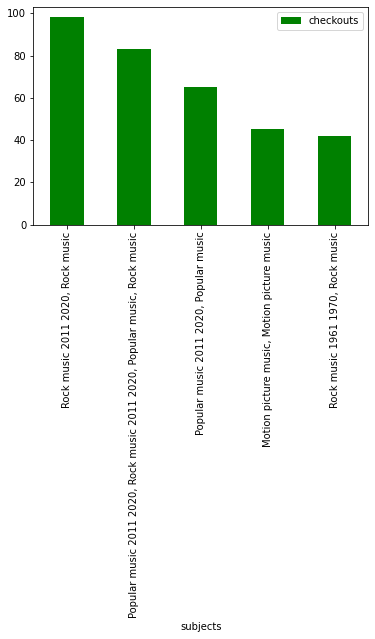

In [25]:
Sounddisc_subjects_df.head(5).plot(kind="bar", color="green")

### Gibt es einen Künstler oder eine Band, die besonders oft in der Bibliothek vorkommt und besondersbeliebt ist?

In [26]:
Sounddisc_df["creator"].value_counts()

Bach, Johann Sebastian, 1685-1750       5
Patterson, James, 1947-                 4
Petty, Tom                              3
Baldacci, David                         3
Verdi, Giuseppe, 1813-1901              3
                                       ..
Cortés, Marco.                          1
Steep Canyon Rangers (Musical group)    1
Clapton, Eric                           1
Rudd, Xavier                            1
Miller, Buddy, 1952-                    1
Name: creator, Length: 702, dtype: int64

In [28]:
Sounddisc_df.groupby("creator").sum().sort_values("checkouts", ascending=False).head(5)

,checkouts
creator,
"Cat Power, 1972-",43
Beatles,39
Imagine Dragons (Musical group),27
"Yorke, Thom",25
Beach House (Musical group),22
